##### Insert all imports in the cell immediately below and nowhere else in this notebook

In [40]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from random import randint
from sklearn.datasets import fetch_mldata

#### Fetch the MNIST data set if not already present in the current working directory:

In [41]:
mnist = fetch_mldata('MNIST original', data_home='.')

### Explore the MNIST dataset
MNIST is one of the most famous ML datasets and it contains 70,000 hand-written digits and their labels. Using `sklearn` to fetch the dataset, as above, `mnist.data` contains the data, while `mnist.target` contains the labels. 

#### (1) Find how many data points there are available and what is their size 
#### (2) How many labels are there? 

(1) There are 70.000 data points. Size of each data point 28x28                                   
(2) Each one of the data points has one label which is a number.                                  
    As a consequence there are 70.000 labels. There are 10 dinstict labels.

In [42]:
print mnist.data.shape

label = set()
for i in mnist.target:
    label.add(int(i))
    
print "Labels:"+ str(label)

(70000, 784)
Labels:set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


#### (3) Extract a random subset of the original data and labels and store them in variables `small_data` and `small_target`. In the remainder of this exercise we will work with these smaller sets. The cardinality of the `small_*` subsets should be 2000. 

In [43]:
#shuffle both small_data and small_target
small_data, small_target = shuffle(mnist.data, mnist.target)

#keep first 2000 elements for both small_data and small_target
small_target = small_target[:2000]
small_data = small_data[:2000]

print str(small_target.size) + ", " + str(small_data.size/784)

2000, 2000


#### (4) Create a function to display a single digit from the MNIST data set and its label. When done, use your function to display one of the digits. Use `small_data` (as opposed to `mnist.data`). 

target 0


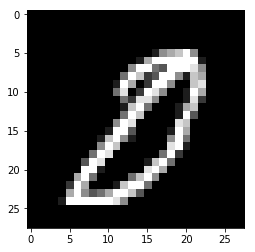

In [44]:
def show_digit():
    """Display the MNIST digit at index `ind` in grayscale"""
    ind = randint(0,2000)
    print "target", int(small_target[ind])
    img = np.array(small_data[ind], dtype='float')
    plt.imshow(img.reshape((28, 28)), cmap='gray')
    plt.show()
    
#take a random number between 0 and 2000
show_digit()

As a pre-processing step either for further processing or visualisation we decompose raw data into their principal components using Principal Component Analysis (PCA). This allows us to reduce the dimensionality of the data while retaining as much of their original variance as possible. `sklearn` provides PCA in the module `sklearn.decomposition`. 

#### (5) Decompose the original data into 2 components in order to be displayable on a 2D graph. Verify PCA does what is expected. 

In [45]:
def decompose(comp,dataset):
    pca = PCA(n_components=comp)
    pca.fit(dataset)
    data=pca.transform(dataset)
    return data

In [46]:
data2d = decompose(2,small_data)
data2d.shape

(2000, 2)

#### (6) Plot all 2D (decomposed) points on a scatter plot 

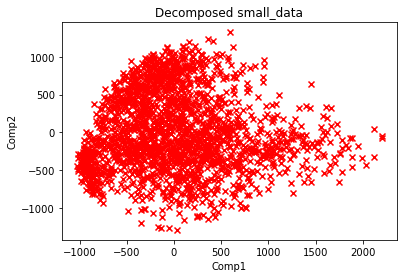

In [47]:
def scatter_plot(x,y, title):
    plt.figure()
    plt.xlabel('Comp1')
    plt.ylabel('Comp2')
    plt.title(title)
    plt.scatter(x[:,0],x[:,1], marker="x", color="red")
    plt.show()
    
scatter_plot(data2d,small_target, "Decomposed small_data")

Depending on the data analysis we want to perform, we are often better off scaling raw data down to some desirable range and recentering them around a mean of 0. `sklearn` contains the necessary tools for this, or you can implement it yourselves.

#### (7) Scale the original data so that they have a mean of 0 and a stdev of 1. Verify your results.

In [48]:
scaled_data = scale(small_data,axis=0)

print "mean: ", np.mean(scaled_data) 
print "variance: ", np.std(scaled_data)

mean:  -1.37758285505e-18
variance:  0.896421457001


#### (8) Decompose the scaled points to 2 components and plot the resulting 2D points. Are there notable differences with the plot before scaling? 

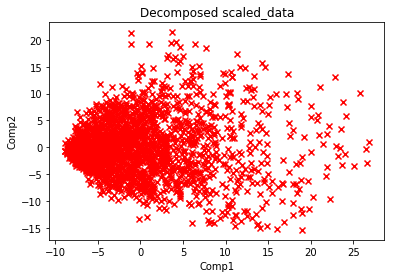

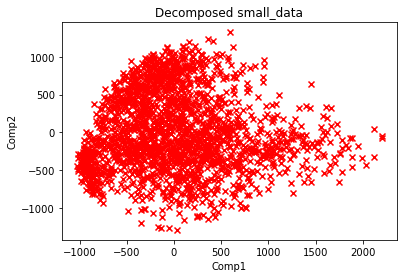

In [49]:
scaled_data2d = decompose(2,scaled_data)

#plots
scatter_plot(scaled_data2d,small_target, "Decomposed scaled_data")
scatter_plot(data2d,small_target, "Decomposed small_data")

It is obvious that data are scaled around a center.

#### (9) Cluster your original and your scaled data using Ward's hierarchical agglomerative clustering method. 

In [50]:
#cluster original data
ward_clustering = AgglomerativeClustering(n_clusters=10, linkage="ward")
ward_clustering.fit(small_data)

#cluster scaled data
scaled_ward_clustering = AgglomerativeClustering(n_clusters=10, linkage="ward")
scaled_ward_clustering.fit(scaled_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)

#### (10) Plot the clustering outcome similar to the 2D plot above, using a different colour for each predicted class.

In [51]:
def c_plot(x,y):
    color = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    plt.scatter(x[:,0],x[:,1], y,c=[color[i] for i in y])
    plt.show()

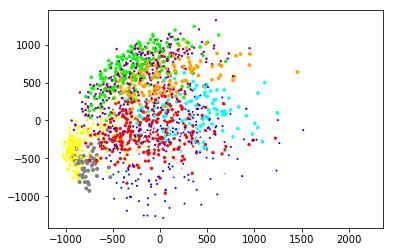

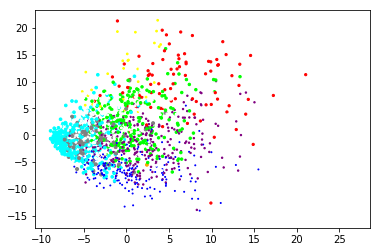

In [52]:
#plots
c_plot(data2d, ward_clustering.labels_)
c_plot(scaled_data2d, scaled_ward_clustering.labels_)

#### (11) Repeat the clustering using complete-link and average-link (instead of Ward) and plot as above. What do you observe? Which seems to be the better clustering method for the data and why? 

In [53]:
#cluster original data using complete-link
comp_clustering = AgglomerativeClustering(n_clusters=10, linkage="complete", affinity = 'cosine')
comp_clustering.fit(small_data)

#cluster scaled data using complete-link
scaled_comp_clustering = AgglomerativeClustering(n_clusters=10,linkage="complete",affinity='cosine')
scaled_comp_clustering.fit(scaled_data2d)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)

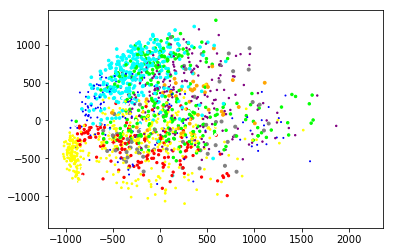

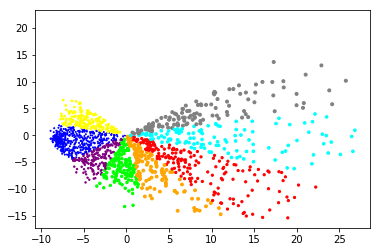

In [54]:
#plots
c_plot(data2d,comp_clustering.labels_)
c_plot(scaled_data2d,scaled_comp_clustering.labels_)

In [55]:
#cluster original data using average-link
avg_clustering = AgglomerativeClustering(n_clusters=10,linkage="average",affinity='cosine') 
avg_clustering.fit(small_data)

#cluster scaled data using average-link
scaled_avg_clustering = AgglomerativeClustering(n_clusters=10,linkage="average",affinity='cosine')
scaled_avg_clustering.fit(scaled_data)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)

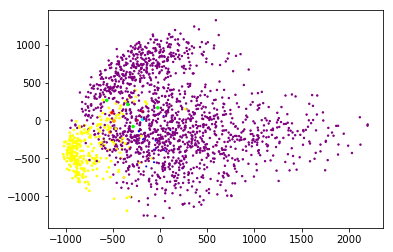

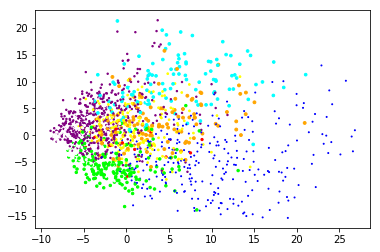

In [56]:
#plots
c_plot(data2d,avg_clustering.labels_)
c_plot(scaled_data2d,scaled_avg_clustering.labels_)

Now we will try to measure the accuracy of our clusters using our labels. Note that as clustering is unsupervised we have no deterministic way of knowing which cluster corresponds to which real label. However we can make use of the fact that we knew the number of classes of the dataset (10).

A simple way of measuring our clustering accuracy is the following. For each real label find the cluster which contains most of its digits. Assume that this is the cluster corresponding to this label and measure its accuracy (number of correct digits/size of the cluster). Last, average over all accuracy measures to produce the overall accuracy.

#### (12) Implement a function to measure the overall accuracy of such a clustering procedure given a clustering outcome and a labels array. Use this function to measure the accuracy of `ward_clustering` and `comp_clustering`. Do you notice any potential problems with this approach? 

In [57]:
def clustering_acc(clustering, labels):
    """Measure the overall accuracy of the given `clustering` given the `labels`."""
    acc=0
    for i in range(10):
        elements = np.where(labels==i)[0]  #we find the positions of elements that have the same value as i
        cluster = np.argmax(np.bincount(clustering.labels_[elements])) # we find how many times each cluster has the 
                                                                         # preferable value and choose the cluster with 
                                                                         # the max number of i
        size=len(np.where(clustering.labels_==cluster)[0]) #find the size of the chosen cluster   
        success = 0
        for j in elements:
            if clustering.labels_[j]==cluster:
                success+=1
        acc+= success/float(size)
    acc=acc/float(10)
    return acc

In [58]:
acc_ward = clustering_acc(ward_clustering, small_target)
acc_comp = clustering_acc(comp_clustering, small_target)
acc_avg = clustering_acc(avg_clustering, small_target)

print 'Ward\'s method:', acc_ward
print 'Complete link:', acc_comp
print 'Average link: ', acc_avg

Ward's method: 0.626488799732
Complete link: 0.305946984258
Average link:  0.175444709334


### PCA for reducing features before clustering

So far we've used PCA for displaying our data on a 2D plot. PCA can be also used to reduce the dimensionality of our samples. This results in a smaller and often more robust representation of our original data.

#### (13) Reduce `small_data` to 10 features and recalculate the accuracies for Ward's method, complete- and average-link. How do they differ in comparison to using the complete feature set? (There is no need to plot anything for this step.) 

In [59]:
scaled_data10d = decompose(10,small_data)

In [60]:
ward_clustering = AgglomerativeClustering(n_clusters=10,linkage="ward") 
ward_clustering.fit(scaled_data10d) 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)

In [61]:
comp_clustering = AgglomerativeClustering(n_clusters=10,linkage="complete",affinity="cosine") 
comp_clustering.fit(scaled_data10d)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)

In [62]:
avg_clustering = AgglomerativeClustering(n_clusters=10,linkage="average",affinity="cosine") 
avg_clustering.fit(scaled_data10d)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)

In [63]:
acc_ward_10d = clustering_acc(ward_clustering, small_target)
acc_comp_10d = clustering_acc(comp_clustering, small_target)
acc_avg_10d = clustering_acc(avg_clustering, small_target)

print 'Ward\'s method:', acc_ward_10d
print 'Complete link:', acc_comp_10d
print 'Average link: ', acc_avg_10d

Ward's method: 0.604185643228
Complete link: 0.438661505419
Average link:  0.622336362163


#### (14) Write a new function combining feature reduction and hierarchical clustering, returning an accuracy figure based on `clustering_acc()` you have created before and the clustering produced. Use the function signature below. 

In [64]:
def reduce_and_hcluster(n_comp, 
                        data=scaled_data, 
                        labels=small_target, 
                        linkage='ward', 
                        n_clusters=10,
                       affinity="cosine"):
    """Reduce and cluster the given data using hierarchical clustering
    Arguments:
        n_comp: the number of components to reduce the data to
        data: the data matrix
        labels: the correct labels, one for each data sample
        linkage: the clustering method to use. It can be 'ward', 
                 'complete' or 'average'
        n_clusters: the number of clusters to take into account
    Return:
        (The accuracy of the clustering with respect to the target labels, 
        the clustering produced)
    """
    new_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkage,affinity=affinity) 
    new_cluster.fit(decompose(n_comp,data)) 
    return [clustering_acc(new_cluster, labels), new_cluster]

#### (15) Using `reduce_and_hcluster()`, write a loop to calculate the accuracies for all three different linkages (ward, complete and average), for reduction of n_comp=4 to 80 with a step of 2 (i.e. for n_comp=4, 6, 8, ..., 80). Store the results in three separate lists, as indicated below. Also store the best (most accurate) clustering for each linkage. [2 marks] 

In [65]:
ward=[]
complete=[]
average=[]

for n_comp in range(4,80,2):
    ward.append(reduce_and_hcluster(n_comp,scaled_data,small_target,linkage="ward",affinity="euclidean"))
    complete.append(reduce_and_hcluster(n_comp,scaled_data,small_target,linkage="complete",affinity="cosine"))
    average.append(reduce_and_hcluster(n_comp,scaled_data,small_target,linkage="average",affinity="cosine"))
best_ward = max(ward)
best_complete = max(complete)
best_average = max(average)

In [66]:
print "best_ward", best_ward
print "best_complete", best_complete
print "best_average", best_average

best_ward [0.6002639166747956, AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)]
best_complete [0.5224330070190472, AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)]
best_average [0.5820536126401146, AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)]


#### (16) Plot the accuracies for the different linkages and number of components on a 2D plot. The x-axis should increase the number of components, while the y-axis should display accuracy. For each linkage choice also plot its accuracy before reducing the dimensions, which was calculated in step 12 - these should be straight lines. The plot should include a legend, axis titles and a grid, and each line should use a different line style. Is there anything worth observing from this plot? 

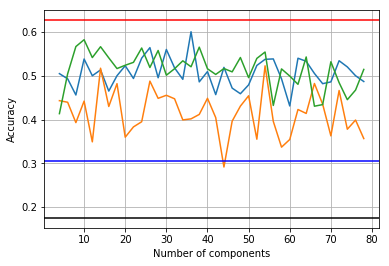

In [69]:

for i in [ward,complete,average]:
    plt.plot( [2*(i.index(row)+2) for row in i],[ row[0] for row in i])
plt.axhline(y=acc_ward,color='red')
plt.axhline(y=acc_comp,color='blue')
plt.axhline(y=acc_avg,color='black')

plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.grid(True) 
plt.show()



#### (17) Store the best clustering objects (`best_ward`, `best_complete`, `best_average`) in a single file using standard `numpy` functionality. The name of the file must be `best_clusters.npz`. Load them back and verify they are correct. 

In [70]:
np.savez('best_clusters.npz', np.array([best_ward , best_complete, best_average]))
h=np.load('best_clusters.npz')
h['arr_0']

array([[0.6002639166747956,
        AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)],
       [0.5224330070190472,
        AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)],
       [0.5820536126401146,
        AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f4af8218d70>)]], dtype=object)